In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import torch
sys.path.append('../../src')

from m3_learning.RHEED.Viz import Viz
from m3_learning.RHEED.Dataset import RHEED_parameter_dataset, RHEED_spot_Dataset
from m3_learning.RHEED.Analysis_umich import fit_curves, analyze_rheed_data, select_range, plot_activation_energy
from m3_learning.RHEED.Fitter1D import Model, Multiscale1DFitter


def collect_data(ys_nor_all, mean_length=2000, viz=False):

    ys_all_same_length = []
    for y in ys_nor_all:
        ys_all_same_length.append(np.interp(np.linspace(0, 1, mean_length), np.linspace(0, 1, len(y)), y))

    ys_all_same_length = np.array(ys_all_same_length)
    ys = torch.tensor(ys_all_same_length).float().unsqueeze(1)

    x = np.linspace(0, 1, mean_length)
    x = torch.tensor(x).float().unsqueeze(0)

    xs = x.repeat(ys.shape[0], 1, 1).squeeze().detach().numpy()
    if viz:
        print(xs.shape, ys.shape)
        Viz.plot_fit_details(xs, ys.squeeze().detach().numpy(), ys.squeeze().detach().numpy(), None, mod=5, labels=None, figsize=(12, 1.5*len(xs)//4+1), style='presentation')
    return xs, ys

temp250


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
../../src\m3_learning\RHEED\Analysis_umich.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ys_nor_all = np.array(ys_nor_all)
../../src\m3_learning\RHEED\Analysis_umich.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ys_nor_fit_all = np.array(ys

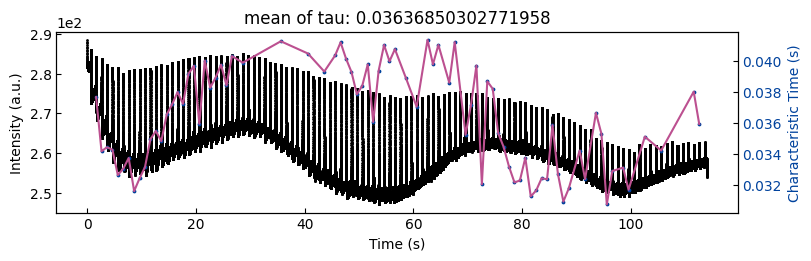

(113, 2000) torch.Size([113, 1, 2000])


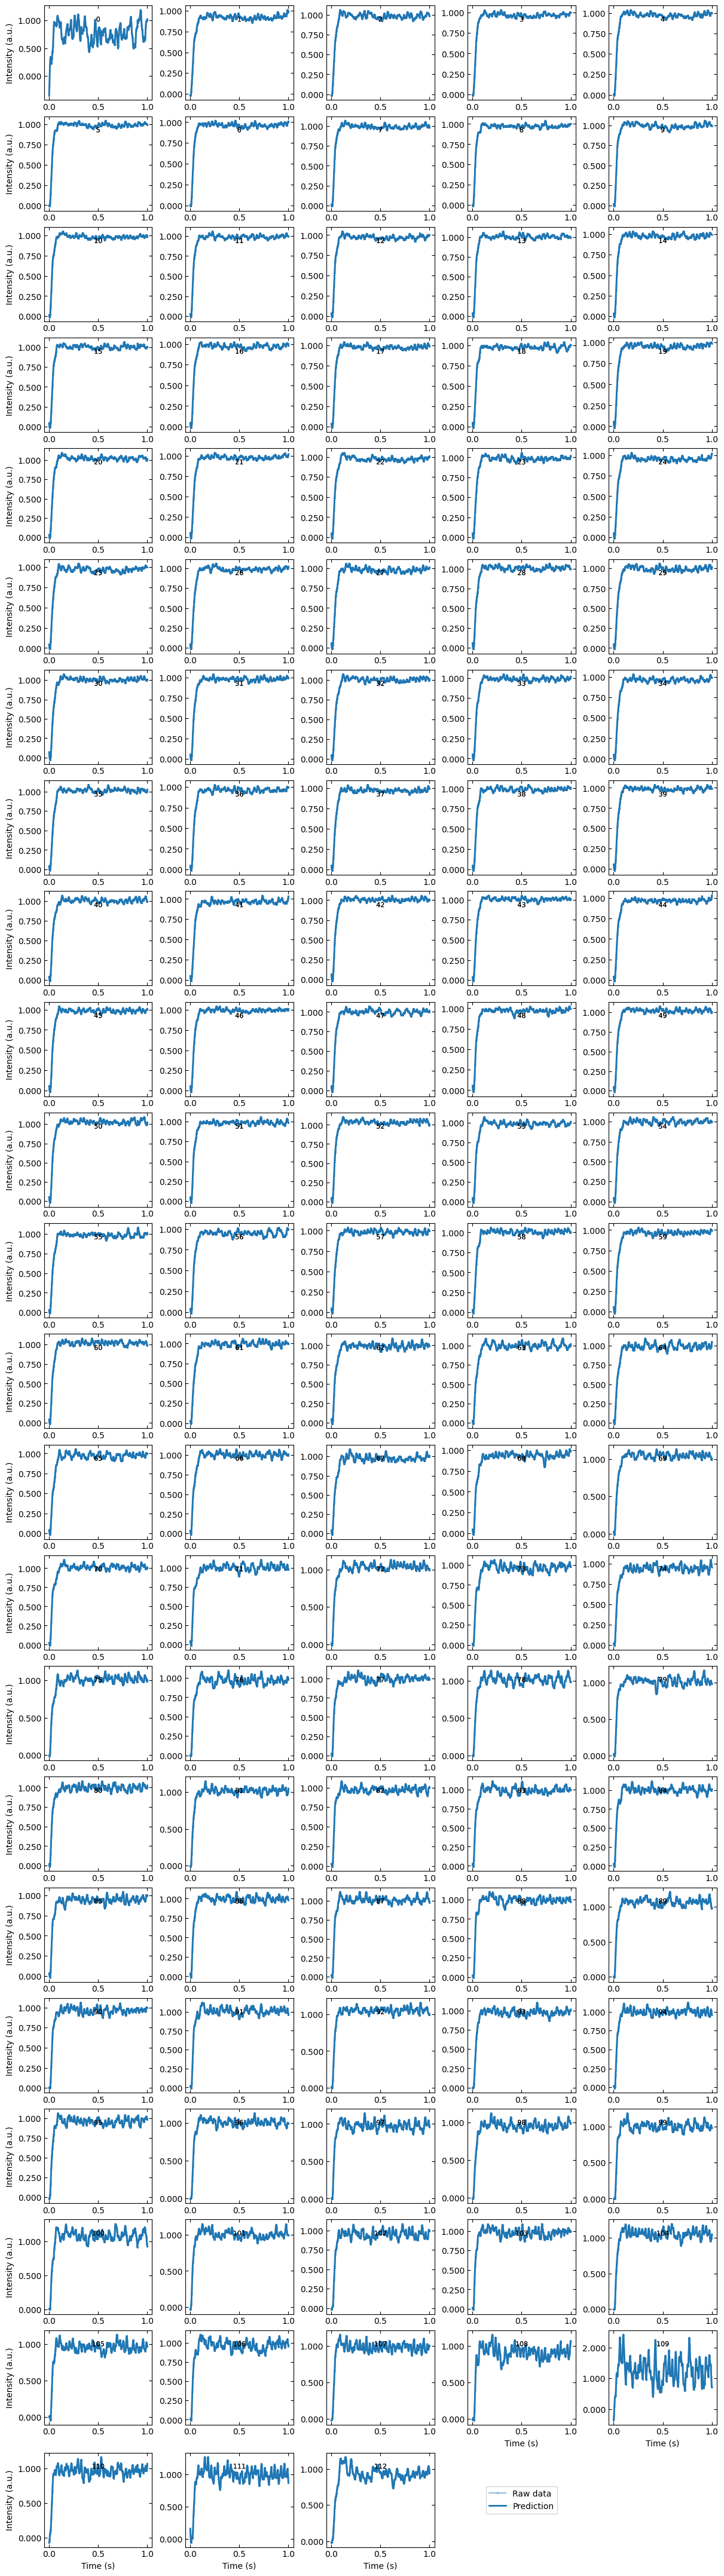

temp300


c:\Users\yig319\Anaconda3\envs\m3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


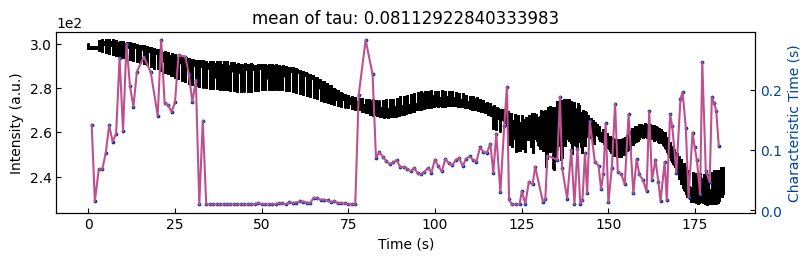

(194, 2000) torch.Size([194, 1, 2000])


In [2]:
# denoise_params = {'savgol_window_order': (51,3), 'pca_component': 3, 'fft_cutoff_order':(20, 1), 'median_kernel_size':51}
denoise_params = {'savgol_window_order': (51, 3), 'pca_component': None, 'fft_cutoff_order':(5, 1), 'median_kernel_size':51}
curve_params = {'trim_first':0, 'tune_tail':True, 'convolve_step':15, 'prominence':0.2, 'mode':'full', 'linear_ratio':0.8}
normalize_params = {'I_diff': None, 'unify':True, 'bounds':[0.01, 1], 'p_init':(1, 0.1, 0.4), 'n_std':1}
viz_params = {'viz_denoise': False, 'viz_curves': False, 'viz_fittings': False, 'viz_ab': False}
    
laser_freq = 1
camera_freq = 2000

ranges_list = [(0, 114), (0, 200), (0, 200)]
temp_list = ['temp250', 'temp300', 'temp350']
ys_list = []

para_path = './Datasets/J14_PM04_05_06_gaussian_fit_parameters_08252023.h5'
ds_para = RHEED_parameter_dataset(para_path, camera_freq=2000, sample_name='J14')
for temp, ranges in zip(temp_list, ranges_list):
    sample_x, sample_y = ds_para.load_curve(growth=temp, spot='spot_2', metric='img_rec_max', x_start=0)
    print(temp)
    data = np.stack([sample_x, sample_y], 1)
    data = select_range(data, *ranges)

    parameters_all, x_list_all, info, tau = analyze_rheed_data(data, camera_freq, laser_freq, denoise_params, curve_params, normalize_params, viz_params)
    # [xs_all, ys_all, ys_fit_all, ys_nor_all, ys_nor_fit_all, ys_nor_fit_failed_all, labels_all, losses_all] = info[3]
    ys_nor_all = info[3]
    xs, ys = collect_data(ys_nor_all, mean_length=2000, viz=True)
    ys_list.append(ys)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
../../src\m3_learning\RHEED\Analysis_umich.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ys_nor_all = np.array(ys_nor_all)
../../src\m3_learning\RHEED\Analysis_umich.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ys_nor_fit_all = np.array(ys

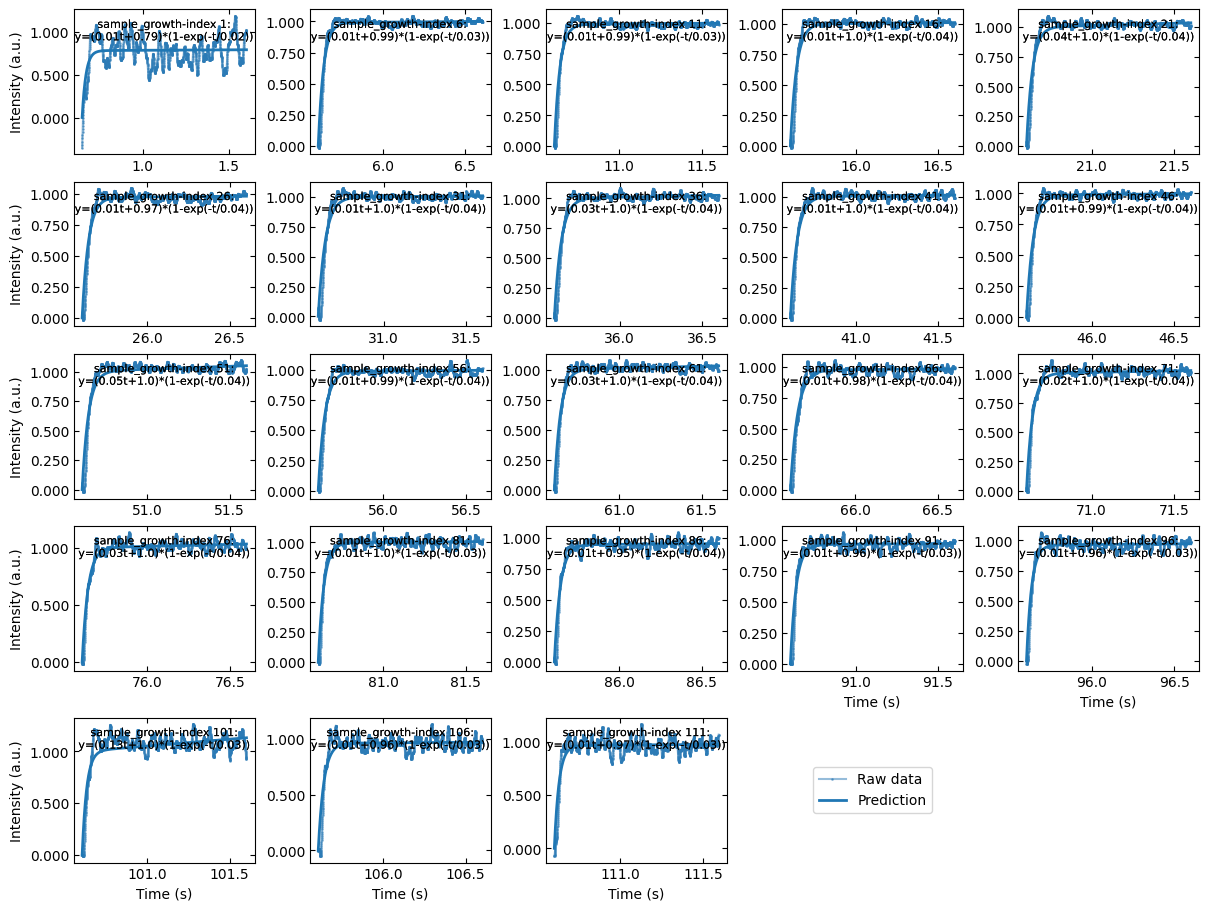

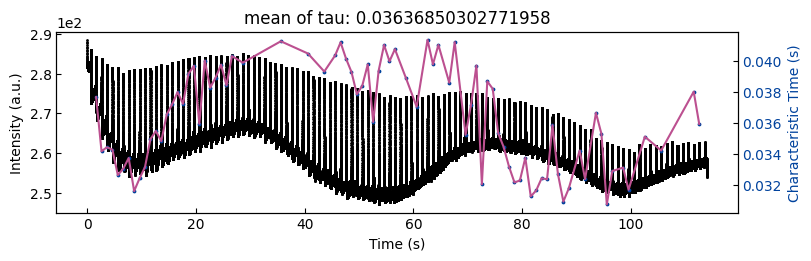

In [2]:
para_path = './Datasets/J14_PM04_05_06_gaussian_fit_parameters_08252023.h5'
ds_para = RHEED_parameter_dataset(para_path, camera_freq=2000, sample_name='J14')
ds_para.dataset_names
# denoise_params = {'savgol_window_order': (51,3), 'pca_component': 3, 'fft_cutoff_order':(20, 1), 'median_kernel_size':51}
denoise_params = {'savgol_window_order': (51, 3), 'pca_component': None, 'fft_cutoff_order':(5, 1), 'median_kernel_size':51}
curve_params = {'trim_first':0, 'tune_tail':True, 'convolve_step':15, 'prominence':0.2, 'mode':'full', 'linear_ratio':0.8}
normalize_params = {'I_diff': None, 'unify':True, 'bounds':[0.01, 1], 'p_init':(1, 0.1, 0.4), 'n_std':1}
viz_params = {'viz_denoise': False, 'viz_curves': False, 'viz_fittings': True, 'viz_ab': False}
    
laser_freq = 1
camera_freq = 2000

sample_x, sample_y = ds_para.load_curve(growth='temp250', spot='spot_2', metric='img_rec_max', x_start=0)
data = np.stack([sample_x, sample_y], 1)
data = select_range(data, *(0, 114))

parameters_all, x_list_all, info, tau = analyze_rheed_data(data, camera_freq, laser_freq, denoise_params, curve_params, normalize_params, viz_params)
[xs_all, ys_all, ys_fit_all, ys_nor_all, ys_nor_fit_all, ys_nor_fit_failed_all, labels_all, losses_all] = info

(113, 1987) torch.Size([113, 1, 1987])


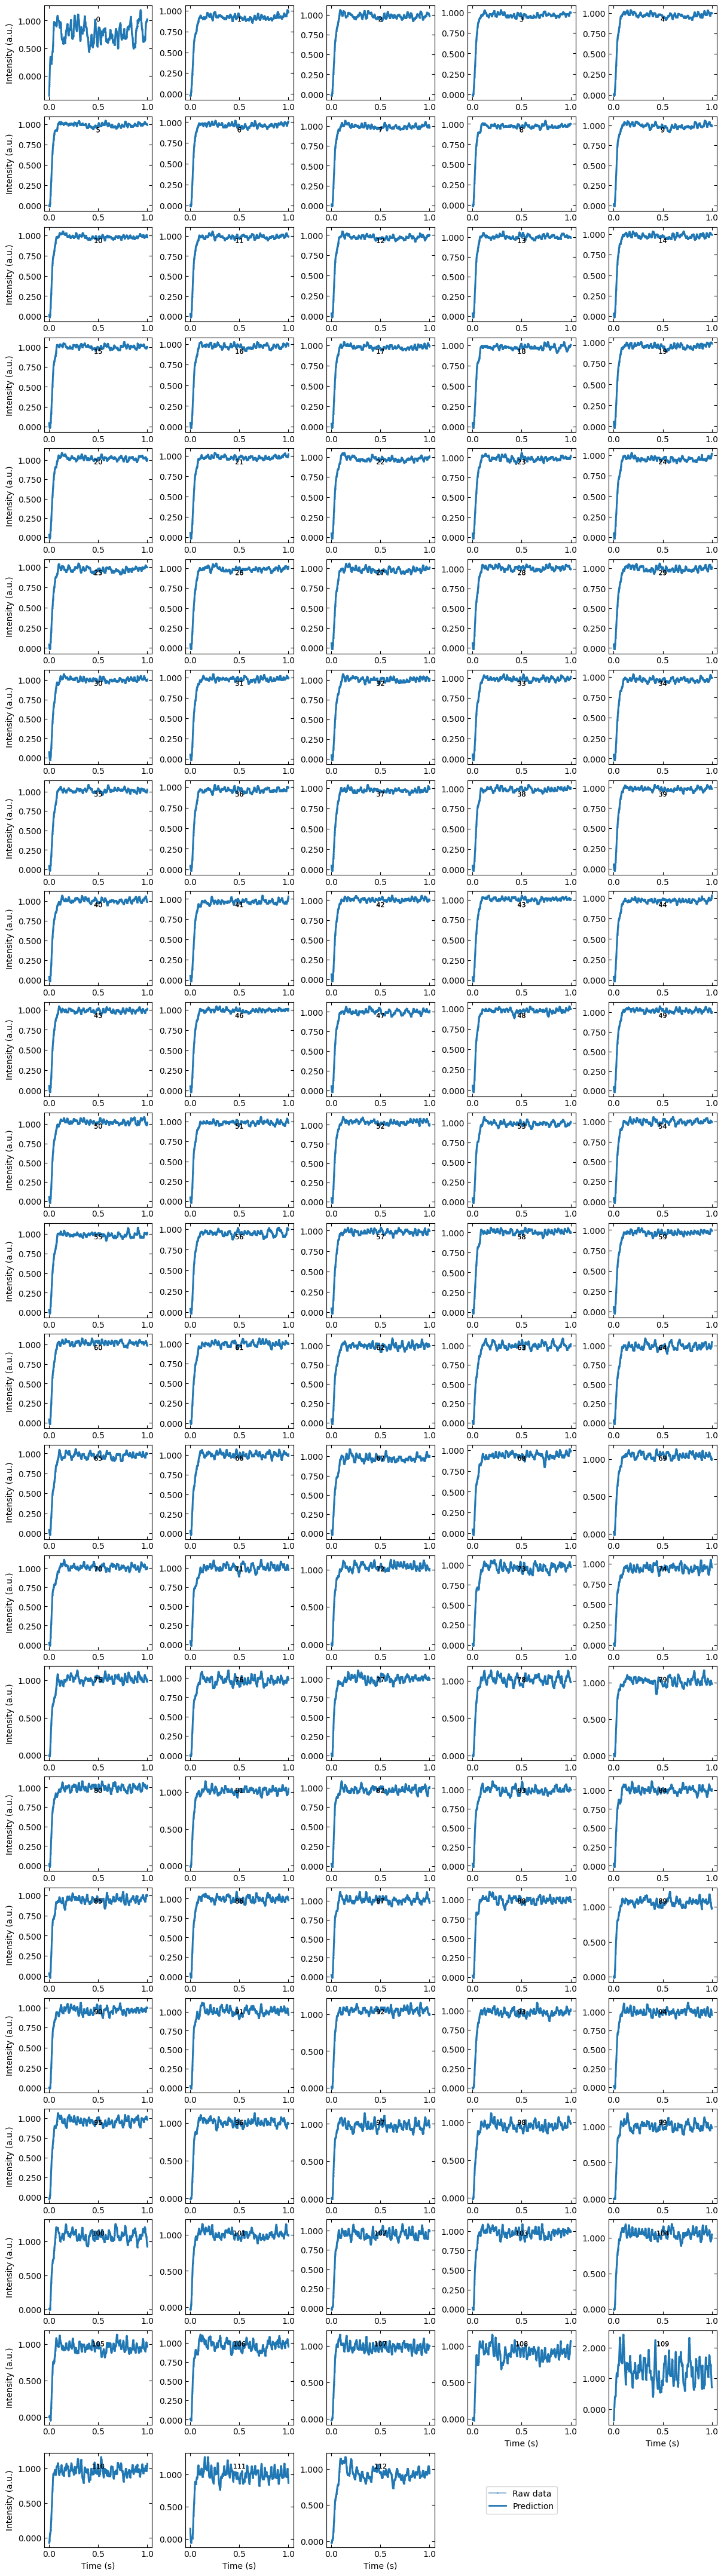

In [5]:
mean_length = np.mean([len(y) for y in ys_nor_all])
mean_length = int(mean_length)
mean_length
# xs_all_same_length, ys_all_same_length = [], []
# for x, y in zip(xs_all, ys_all):
#     ys_all_same_length.append(np.interp(np.linspace(0, 1, mean_length), np.linspace(0, 1, len(y)), y))
#     xs_all_same_length.append(np.interp(np.linspace(0, 1, mean_length), np.linspace(0, 1, len(x)), x))

# xs_all_same_length = np.array(xs_all_same_length)
# ys_all_same_length = np.array(ys_all_same_length)
# xs_all_same_length.shape, ys_all_same_length.shape
# x = torch.tensor(xs_all_same_length).float().unsqueeze(1)
# y = torch.tensor(ys_all_same_length).float().unsqueeze(1)
# x.shape, y.shape


ys_all_same_length = []
for y in ys_nor_all:
    ys_all_same_length.append(np.interp(np.linspace(0, 1, mean_length), np.linspace(0, 1, len(y)), y))

ys_all_same_length = np.array(ys_all_same_length)
# x = torch.tensor(xs_all_same_length).float().unsqueeze(1)
ys = torch.tensor(ys_all_same_length).float().unsqueeze(1)

x = np.linspace(0, 1, mean_length)
x = torch.tensor(x).float().unsqueeze(0)

xs = x.repeat(ys.shape[0], 1, 1).squeeze().detach().numpy()
# ys = ys.squeeze().detach().numpy()
print(xs.shape, ys.shape)
Viz.plot_fit_details(xs, ys.squeeze().detach().numpy(), ys.squeeze().detach().numpy(), None, mod=5, labels=None, figsize=(12, 1.5*len(xs)//4+1), style='presentation')

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader
sys.path.append('../../../../helper_functions')
from standard_train_functions import train_epochs

# def exponential_fit_func(params, x, device=torch.device('cpu')):
#     x = x.repeat(params.shape[0], 1, 1)
#     x = torch.permute(x, (1,2,0))
#     a = params[:, 0].type(torch.float64)
#     b = params[:, 1].type(torch.float64)
#     tau = params[:, 2].type(torch.float64)
#     tau = torch.relu(tau)

#     params = params.to(device)
#     x = torch.tensor(x).to(device)
#     y = (a * x + b) * (1 - torch.exp(-x / tau))
#     y = torch.permute(y, (2,0,1))
#     return y

def exponential_fit_func(params, x, device=torch.device('cpu')):
    x = x.repeat(params.shape[0], 1, 1)
    x = torch.permute(x, (1,2,0))
    b = params[:, 0].type(torch.float64)
    tau = params[:, 1].type(torch.float64)
    tau = torch.relu(tau)

    params = params.to(device)
    x = torch.tensor(x).to(device)
    y = b * (1 - torch.exp(-x / tau))
    y = torch.permute(y, (2,0,1))
    return y
params = torch.randn([113, 2])
out = exponential_fit_func(params, x)
out.shape

C:\Users\yig319\AppData\Local\Temp\ipykernel_13080\4070773218.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device)


torch.Size([113, 1, 1987])

In [7]:
dataset = TensorDataset(ys)
train_ds, valid_ds = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset)-int(len(dataset)*0.8)])
train_dl = DataLoader(train_ds, shuffle=True, num_workers=3, batch_size=16) 
valid_dl = DataLoader(valid_ds, shuffle=True, num_workers=3, batch_size=16) 
y_batch = next(iter(train_dl))
y_batch[0].shape

torch.Size([16, 1, 1987])

In [10]:
model = Multiscale1DFitter(exponential_fit_func, x_data=x, input_channels=1, num_params=2, device=torch.device('cpu'))
model.training = True
out, unscaled_param = model(ys[:100])
# x.shape, y.shape, out.shape, unscaled_param.shape

C:\Users\yig319\AppData\Local\Temp\ipykernel_13080\4070773218.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device)


In [11]:
epochs=100
lr=1e-3
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr, steps_per_epoch=len(train_dl), epochs=epochs)
device = torch.device('cpu')
def predict_func(model, batch, device):
    # print(batch)
    inputs = batch[0].to(device).double()
    # print(inputs.dtype)
    model = model.to(device).double()
    # print(model.device, inputs.device)
    outputs, unscaled_param = model(inputs)
    # print(unscaled_param[:5])
    return outputs, inputs, inputs
train_epochs(model, loss_func, optimizer, device, train_dl, valid_dl, test_dl=None, predict_func=predict_func, epochs=epochs, 
             scheduler=scheduler, accuracy=False)

Epoch: 1/100


  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\yig319\AppData\Local\Temp\ipykernel_13080\4070773218.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device)
100%|██████████| 6/6 [00:01<00:00,  3.89it/s]


Training Loss: 1.8440


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Validation Loss: 1.7875
Epoch: 2/100


100%|██████████| 6/6 [00:01<00:00,  3.99it/s]


Training Loss: 1.7457


100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


Validation Loss: 1.6719
Epoch: 3/100


100%|██████████| 6/6 [00:01<00:00,  3.94it/s]


Training Loss: 1.6216


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 1.5569
Epoch: 4/100


100%|██████████| 6/6 [00:01<00:00,  3.88it/s]


Training Loss: 1.5138


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 1.4403
Epoch: 5/100


100%|██████████| 6/6 [00:01<00:00,  3.98it/s]


Training Loss: 1.3861


100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


Validation Loss: 1.2962
Epoch: 6/100


100%|██████████| 6/6 [00:01<00:00,  3.97it/s]


Training Loss: 1.2402


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Validation Loss: 1.1493
Epoch: 7/100


100%|██████████| 6/6 [00:01<00:00,  3.93it/s]


Training Loss: 1.0825


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 0.9685
Epoch: 8/100


100%|██████████| 6/6 [00:01<00:00,  3.90it/s]


Training Loss: 0.8808


100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


Validation Loss: 0.7368
Epoch: 9/100


100%|██████████| 6/6 [00:01<00:00,  3.85it/s]


Training Loss: 0.6446


100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


Validation Loss: 0.5057
Epoch: 10/100


100%|██████████| 6/6 [00:01<00:00,  3.76it/s]


Training Loss: 0.4292


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Validation Loss: 0.3152
Epoch: 11/100


100%|██████████| 6/6 [00:01<00:00,  3.85it/s]


Training Loss: 0.2578


100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


Validation Loss: 0.1759
Epoch: 12/100


100%|██████████| 6/6 [00:01<00:00,  3.95it/s]


Training Loss: 0.1409


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Validation Loss: 0.0942
Epoch: 13/100


100%|██████████| 6/6 [00:01<00:00,  3.92it/s]


Training Loss: 0.0771


100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


Validation Loss: 0.0537
Epoch: 14/100


100%|██████████| 6/6 [00:01<00:00,  3.99it/s]


Training Loss: 0.0475


100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


Validation Loss: 0.0369
Epoch: 15/100


100%|██████████| 6/6 [00:01<00:00,  3.91it/s]


Training Loss: 0.0353


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 0.0304
Epoch: 16/100


100%|██████████| 6/6 [00:01<00:00,  3.93it/s]


Training Loss: 0.0309


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 0.0278
Epoch: 17/100


100%|██████████| 6/6 [00:01<00:00,  3.94it/s]


Training Loss: 0.0290


100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


Validation Loss: 0.0268
Epoch: 18/100


100%|██████████| 6/6 [00:01<00:00,  3.96it/s]


Training Loss: 0.0283


100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


Validation Loss: 0.0263
Epoch: 19/100


100%|██████████| 6/6 [00:01<00:00,  3.90it/s]


Training Loss: 0.0279


100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


Validation Loss: 0.0260
Epoch: 20/100


100%|██████████| 6/6 [00:01<00:00,  3.82it/s]


Training Loss: 0.0277


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 0.0259
Epoch: 21/100


100%|██████████| 6/6 [00:01<00:00,  3.95it/s]


Training Loss: 0.0276


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Validation Loss: 0.0258
Epoch: 22/100


100%|██████████| 6/6 [00:01<00:00,  3.94it/s]


Training Loss: 0.0276


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Validation Loss: 0.0258
Epoch: 23/100


100%|██████████| 6/6 [00:01<00:00,  3.98it/s]


Training Loss: 0.0275


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Validation Loss: 0.0257
Epoch: 24/100


  0%|          | 0/6 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [13]:
model

Multiscale1DFitter(
  (hidden_x1): Sequential(
    (0): Conv1d(1, 8, kernel_size=(7,), stride=(1,))
    (1): SELU()
    (2): Conv1d(8, 6, kernel_size=(7,), stride=(1,))
    (3): SELU()
    (4): Conv1d(6, 4, kernel_size=(5,), stride=(1,))
    (5): SELU()
    (6): AdaptiveAvgPool1d(output_size=64)
  )
  (hidden_xfc): Sequential(
    (0): Linear(in_features=256, out_features=20, bias=True)
    (1): SELU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): SELU()
  )
  (hidden_x2): Sequential(
    (0): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv1d(2, 4, kernel_size=(5,), stride=(1,))
    (2): SELU()
    (3): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (4): SELU()
    (5): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (6): SELU()
    (7): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (8): SELU()
    (9): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (10): SELU()
    (11): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
   

C:\Users\yig319\AppData\Local\Temp\ipykernel_13080\4070773218.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device)


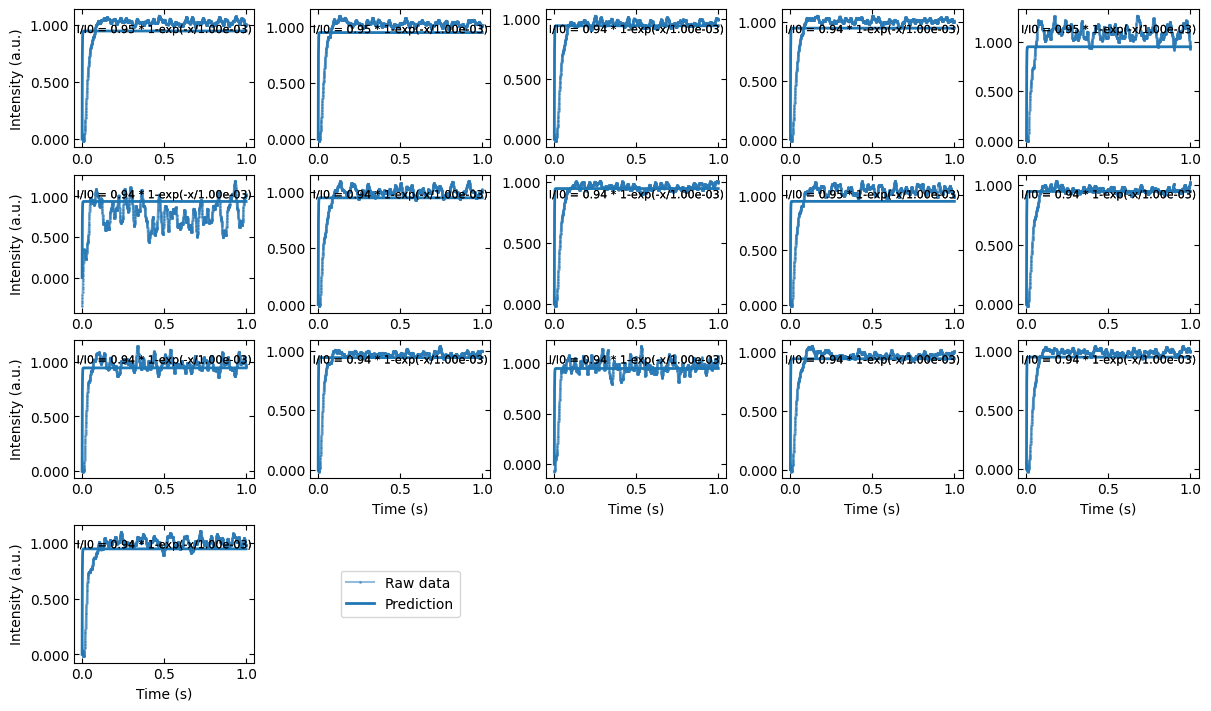

In [15]:
def viz_fit(model, batch, device):
    inputs = batch[0].to(device).double()
    model = model.to(device).double()
    outputs, unscaled_param = model(inputs)
    labels = []
    for param in unscaled_param:
        labels.append(f'I/I0 = {param[0]:.2f} * 1-exp(-x/{param[1]:.2e})')

    xs = x.repeat(outputs.shape[0], 1, 1).squeeze().detach().cpu().numpy()
    ys = inputs.squeeze().detach().cpu().numpy()
    ys_fit = outputs.squeeze().detach().cpu().numpy()
    # print(xs.shape, ys.shape, ys_fit.shape)
    Viz.plot_fit_details(xs, ys, ys_fit, None, mod=5, labels=labels, figsize=(12, 1.5*len(xs)//4+1), style='presentation')
    
batch = next(iter(train_dl))
viz_fit(model, batch, device)

In [12]:
inputs.shape

NameError: name 'inputs' is not defined

In [20]:
out, unscaled_param = model(ys[:100].double())
out.shape, unscaled_param.shape

C:\Users\yig319\AppData\Local\Temp\ipykernel_36600\305091091.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device)


(torch.Size([100, 1, 1987]), torch.Size([100, 3]))

In [21]:
unscaled_param

tensor([[-0.5581,  0.9351,  2.0663],
        [-0.5447,  0.9175,  2.0208],
        [-0.5316,  0.9003,  1.9759],
        [-0.5199,  0.8831,  1.9355],
        [-0.5104,  0.8709,  1.8973],
        [-0.4936,  0.8460,  1.8292],
        [-0.4885,  0.8383,  1.8111],
        [-0.4868,  0.8356,  1.7989],
        [-0.4733,  0.8157,  1.7457],
        [-0.4829,  0.8293,  1.7861],
        [-0.4665,  0.8051,  1.7137],
        [-0.4603,  0.7959,  1.6858],
        [-0.4631,  0.8000,  1.6997],
        [-0.4540,  0.7860,  1.6524],
        [-0.4608,  0.7961,  1.6851],
        [-0.4627,  0.7996,  1.6923],
        [-0.4623,  0.7982,  1.6885],
        [-0.4613,  0.7970,  1.6885],
        [-0.4230,  0.7327,  1.4900],
        [-0.4459,  0.7717,  1.6105],
        [-0.4374,  0.7583,  1.5706],
        [-0.4372,  0.7572,  1.5663],
        [-0.4460,  0.7718,  1.6150],
        [-0.4344,  0.7523,  1.5501],
        [-0.4327,  0.7493,  1.5410],
        [-0.4474,  0.7735,  1.6153],
        [-0.4262,  0.7370,  1.5047],
 